# This dataset has been downloaded from UCI 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_erro
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [39]:
df=pd.read_csv('abalone.csv')

In [40]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
...,...,...,...,...,...,...,...,...,...
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10.0
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12.0
4177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.shape

(4179, 9)

In [42]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [43]:
df.isna().sum()

Sex                           2
Length                        2
Diameter                      2
Height                        2
Whole weight                  2
Shucked weight                2
Viscera weightShell weight    2
Shell weight                  2
Rings                         2
dtype: int64

In [44]:
data=df.dropna(how='all')

In [45]:
data.isna().sum()

Sex                           0
Length                        0
Diameter                      0
Height                        0
Whole weight                  0
Shucked weight                0
Viscera weightShell weight    0
Shell weight                  0
Rings                         0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         4177 non-null   object 
 1   Length                      4177 non-null   float64
 2   Diameter                    4177 non-null   float64
 3   Height                      4177 non-null   float64
 4   Whole weight                4177 non-null   float64
 5   Shucked weight              4177 non-null   float64
 6   Viscera weightShell weight  4177 non-null   float64
 7   Shell weight                4177 non-null   float64
 8   Rings                       4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 326.3+ KB


In [47]:
data.Sex

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [48]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weightShell weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [49]:
data.dropna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [50]:
X = data.drop(['Sex'], axis=1)

y = data['Sex']

In [51]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3341, 8), (836, 8))

In [53]:
import category_encoders as ce

In [54]:
encoder = ce.OrdinalEncoder(cols=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weightShell weight','Shell weight','Rings'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [55]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
3141,1,1,1,1,1,1,1,1
3521,2,2,2,2,2,2,2,2
883,3,3,3,3,3,3,3,3
3627,4,4,4,4,4,4,4,4
2106,5,5,5,5,5,5,5,5


In [56]:
X_test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
668,25,53.0,5,916.0,1089.0,309.0,98.0,12.0
1580,28,27.0,20,1417.0,70.0,619.0,-1.0,11.0
3784,37,13.0,5,532.0,-1.0,749.0,822.0,6.0
463,122,104.0,2,890.0,281.0,666.0,45.0,1.0
2615,38,38.0,31,1183.0,1414.0,-1.0,-1.0,10.0


In [57]:
# convert text labels to integer labels
sex_label = LabelEncoder()
data['Sex'] = sex_label.fit_transform(data['Sex'])
data.head()

<ipython-input-57-abe17b9a9b3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = sex_label.fit_transform(data['Sex'])


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [58]:
data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [59]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [60]:
#import the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500,tol=0.001)

In [61]:
#import Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, tol=0.001)

In [62]:
model.intercept_

array([-0.03500734, -0.08173246,  0.1167398 ])

In [63]:
model.coef_

array([[-8.99289651e-02, -4.81336137e-02,  2.14806260e-03,
        -2.12498103e-02,  6.62047031e-02,  5.34963839e-02,
        -5.15201072e-02, -7.52537049e-02],
       [ 1.76486296e-01,  9.13870430e-02, -2.03998451e-03,
         8.86481078e-03, -1.29489402e-01, -9.60937578e-02,
         6.95401692e-02,  1.74415376e-01],
       [-8.65573310e-02, -4.32534293e-02, -1.08078084e-04,
         1.23849995e-02,  6.32846992e-02,  4.25973739e-02,
        -1.80200620e-02, -9.91616712e-02]])

In [64]:
#Validating the model
#Performance measures for classification
model.score(X_test_scaled,y_test)

0.3923444976076555

In [65]:
#k-fold cross-validation score
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=1000,tol=0.001),
                X_train_scaled, y_train,cv=5).mean().round(4)*100

40.589999999999996

In [66]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [67]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=3).mean()

0.5281286357897863

In [68]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

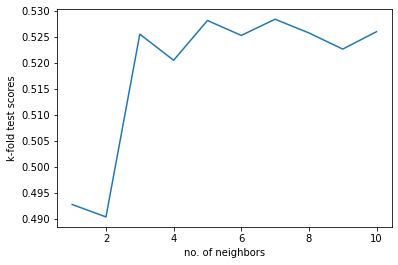

In [69]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()


# 7-NN is the best

In [ ]:
#SVM MODEL

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics, svm

In [71]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3],
                        'gamma' : [0.1,1,10]
                    }

model = GridSearchCV(SVC(random_state=0),param_grid=params_dictionary,cv=10)


In [124]:
model.best_params_

{'max_depth': 15, 'n_estimators': 130}

In [126]:
model.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})

In [125]:
model.best_score_

0.5436858168967219

In [89]:
svm =model.best_estimator_

In [90]:
svm.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, n_estimators=80, random_state=0)

In [91]:
svm.score(X_test,y_test)

0.5444976076555024

# ADABOOST

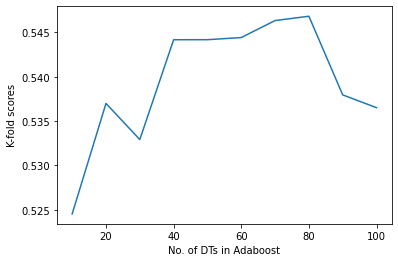

In [107]:
from sklearn.ensemble import AdaBoostClassifier


#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,110,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=10).mean())
plt.plot(range(10,110,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [104]:
from sklearn.tree import DecisionTreeClassifier
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeClassifier(max_depth=9,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0),
                               DecisionTreeClassifier(max_depth=11,random_state=0)]
        }
model = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=10)
model.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=9,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=11,
                                                                   random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [105]:
model.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=10, random_state=0),
 'n_estimators': 80}

In [106]:
model.best_score_

0.5348284052184089

# RABDOMFOREST

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [109]:
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=9),
                                  X,y,cv=4).mean())

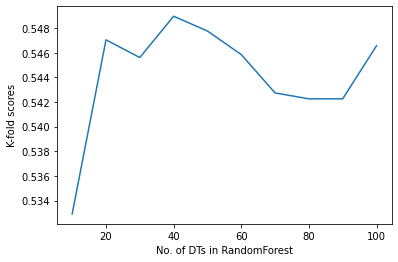

In [110]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [112]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [13,14,15]
        }
model = GridSearchCV(RandomForestClassifier(), params,cv=10)
model.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})

In [113]:
model.best_params_

{'max_depth': 15, 'n_estimators': 130}

In [114]:
model.best_score_

0.5436858168967219

In [115]:
best_model = model.best_estim


In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [117]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=130)

In [118]:
best_model.score(X_test,y_test)

0.5588516746411484

In [119]:
best_model = model.best_estimator_

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [121]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=130)

In [122]:
y_pred = best_model.predict(X_test)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           F       0.44      0.38      0.41       316
           I       0.73      0.78      0.75       359
           M       0.47      0.48      0.48       370

    accuracy                           0.56      1045
   macro avg       0.54      0.55      0.55      1045
weighted avg       0.55      0.56      0.55      1045



In [1]:
import os 
import sys 

In [2]:
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client" 
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [3]:
#import Sparksession driver
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Classification of abalone Dataset") \
    .getOrCreate()

In [4]:
df = spark.read.csv('abalone.csv',inferSchema=True,header=True)

In [5]:
df.show(5)

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|                    0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|                    0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|                     0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|                    0.0395|       0.055|    7|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
only showing top 5 rows



In [6]:
#Check for missing values
for col in df.columns:
    print("no. of cells in column", col, "with null values:", df.filter(df[col].isNull()).count())

no. of cells in column Sex with null values: 2
no. of cells in column Length with null values: 2
no. of cells in column Diameter with null values: 2
no. of cells in column Height with null values: 2
no. of cells in column Whole weight with null values: 2
no. of cells in column Shucked weight with null values: 2
no. of cells in column Viscera weightShell weight with null values: 2
no. of cells in column Shell weight with null values: 2
no. of cells in column Rings with null values: 2


In [7]:
data=df.dropna(how='all')

In [8]:
for col in data.columns:
    print("no. of cells in column", col, "with null values:", data.filter(data[col].isNull()).count())

no. of cells in column Sex with null values: 0
no. of cells in column Length with null values: 0
no. of cells in column Diameter with null values: 0
no. of cells in column Height with null values: 0
no. of cells in column Whole weight with null values: 0
no. of cells in column Shucked weight with null values: 0
no. of cells in column Viscera weightShell weight with null values: 0
no. of cells in column Shell weight with null values: 0
no. of cells in column Rings with null values: 0


In [9]:
#Label encoder
from pyspark.ml.feature import StringIndexer
indexed = data
for col in data.columns:
    stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_encoded")
    indexed = stringIndexer.fit(indexed).transform(indexed)
indexed.show()

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|Sex_encoded|Length_encoded|Diameter_encoded|Height_encoded|Whole weight_encoded|Shucked weight_encoded|Viscera weightShell weight_encoded|Shell weight_encoded|Rings_encoded|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|        0.0|          42.0|            33.0|          20.0|           

In [10]:
#all the independent variables need to be packed into one column of vector type
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=["Length_encoded","Height_encoded","Whole weight_encoded","Shucked weight_encoded","Viscera weightShell weight_encoded","Shell weight_encoded","Rings_encoded"], 
                            outputCol="features")
feature_vec=assembler.transform(indexed)
feature_vec.select("features").show(5)

+--------------------+
|            features|
+--------------------+
|[42.0,20.0,91.0,5...|
|[54.0,16.0,68.0,4...|
|[12.0,7.0,964.0,3...|
|[32.0,5.0,360.0,3...|
|[69.0,22.0,362.0,...|
+--------------------+
only showing top 5 rows



In [11]:
#Count of target classes
feature_vec.groupBy('Sex_encoded').count().show()
#there is data imbalance

+-----------+-----+
|Sex_encoded|count|
+-----------+-----+
|        0.0| 1528|
|        1.0| 1342|
|        2.0| 1307|
+-----------+-----+



In [12]:
# Split the data into train and test sets
train_data, test_data = feature_vec.randomSplit([.75,.25],seed=0)

In [13]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="Sex_encoded", featuresCol="features",  
                        maxIter=100, regParam=0.0001, family="multinomial",  
                        elasticNetParam=0.0)

# Train model with Training Data
lrModel = lr.fit(train_data)
predictions = lrModel.transform(test_data)
predictions.printSchema()

root
 |-- Sex: string (nullable = true)
 |-- Length: double (nullable = true)
 |-- Diameter: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Whole weight: double (nullable = true)
 |-- Shucked weight: double (nullable = true)
 |-- Viscera weightShell weight: double (nullable = true)
 |-- Shell weight: double (nullable = true)
 |-- Rings: integer (nullable = true)
 |-- Sex_encoded: double (nullable = true)
 |-- Length_encoded: double (nullable = true)
 |-- Diameter_encoded: double (nullable = true)
 |-- Height_encoded: double (nullable = true)
 |-- Whole weight_encoded: double (nullable = true)
 |-- Shucked weight_encoded: double (nullable = true)
 |-- Viscera weightShell weight_encoded: double (nullable = true)
 |-- Shell weight_encoded: double (nullable = true)
 |-- Rings_encoded: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable 

In [14]:
predictions.select('Sex_encoded','prediction').show()

+-----------+----------+
|Sex_encoded|prediction|
+-----------+----------+
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       0.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       0.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       0.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
+-----------+----------+
only showing top 20 rows



In [15]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Sex_encoded', metricName='accuracy')
evaluator.evaluate(predictions)

0.4837758112094395

In [16]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Sex_encoded', metricName='f1')
evaluator.evaluate(predictions)

0.4594455745072952

In [17]:
predictions.groupBy('Sex_encoded').count().show()

+-----------+-----+
|Sex_encoded|count|
+-----------+-----+
|        0.0|  386|
|        1.0|  323|
|        2.0|  308|
+-----------+-----+



In [18]:
#Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()\
             .addGrid(lr.regParam,[0.001,0.01,0.1,1])\
             .addGrid(lr.elasticNetParam,[0.0,0.5,1.0])\
             .build())

# Create 4-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)

cvModel = cv.fit(train_data)

In [19]:
list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))

[(0.435413257759371,
  {Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}),
 (0.43486233352356063,
  {Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5}),
 (0.4376947037442547,
  {Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='elasticNetParam', doc='the ElasticNet m

In [20]:
#Best Model Params
score_params_list = list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))
max(score_params_list,key=lambda item:item[0])

(0.4376947037442547,
 {Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
  Param(parent='LogisticRegression_4abe904698e4a3f9d3df', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0})

In [21]:
predictions = cvModel.bestModel.transform(test_data)

In [22]:
evaluator.evaluate(predictions)

0.46070774663183733


Conclusion - Goal isto predict sex of the abalone based on their physical characteristics but the
model is not good because of the number of instances per class in the dataset is less to the model to learn the patterns
between the features.After trying out all the different models i found randomforest seems best among rest of it



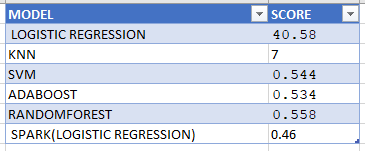




